In [17]:
import os
import itertools
import pandas as pd

def file_size_ratio(path_a, path_b):
    try:
        size_a = os.path.getsize(path_a)
        
        size_b = os.path.getsize(path_b)

        ratio = size_a / size_b

        return ratio
    
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [20]:
df2b = pd.DataFrame({"model": {}, "CR": {}})
models = ["gemma-2b.Q3_K_M", "gemma-2b.Q4_K_M", "gemma-2b.Q5_K_M", "gemma-2b.Q6_K", "gemma-2b.Q8_0", "gemma-2b-bf16"]

for model in models:
    original_path = f"genesis/en-50.txt"
    compressed_path = f"quantization-genesis/{model}-50-2b.llzip"
    CR = file_size_ratio(original_path, compressed_path)

    df2b.loc[len(df2b)] = {"model": model, "CR": CR}

In [45]:
df = pd.DataFrame({"model": {}, "CR_2b": {}, "CR_7b": {}})
quant_levels = ["Q3_K_M", "Q4_K_M", "Q5_K_M", "Q6_K", "Q8_0", "bf16"]

for level in quant_levels:
    original_path = f"genesis/en-50.txt"
    compressed_path = f"quantization-genesis/gemma-2b.{level}-50-2b.llzip"
    CR_2b = file_size_ratio(original_path, compressed_path)
    
    print(level)
    if level != "bf16":
        original_path = f"genesis/en-50.txt"
        compressed_path = f"quantization-genesis/gemma-7b-{level}-50-7b.llzip"
        CR_7b = file_size_ratio(original_path, compressed_path)
    else:
        CR_7b = None

    df.loc[len(df)] = {"model": level, "CR_2b": CR_2b, "CR_7b": CR_7b}

Q3_K_M
Q4_K_M
Q5_K_M
Q6_K
Q8_0
bf16


/tmp/ipykernel_221632/842013046.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[len(df)] = {"model": level, "CR_2b": CR_2b, "CR_7b": CR_7b}


In [52]:
df["latency_2b"] = [59, 69, 82, 98, 122, 3*60 + 21]
df["latency_7b"] = [4*60 + 5, 4*60 + 23, 5*60 + 4, 6*60 + 2, 6*60 + 57, None]
df

,model,CR_2b,CR_7b,latency_2b,latency_7b
0,Q3_K_M,4.538292,1.521353,59,245.0
1,Q4_K_M,33.862637,60.421569,69,263.0
2,Q5_K_M,41.925170,65.563830,82,304.0
3,Q6_K,42.798611,64.197917,98,362.0
4,Q8_0,44.985401,66.989130,122,417.0
5,bf16,45.316176,NaN,201,NaN


In [25]:
df7b = pd.DataFrame({"model": {}, "CR": {}})
models=("gemma-7b-Q3_K_M", "gemma-7b-Q4_K_M", "gemma-7b-Q5_K_M", "gemma-7b-Q6_K", "gemma-7b-Q8_0") 

for model in models:
    original_path = f"genesis/en-50.txt"
    compressed_path = f"quantization-genesis/{model}-50-7b.llzip"
    CR = file_size_ratio(original_path, compressed_path)

    df7b.loc[len(df7b)] = {"model": model, "CR": CR}

In [26]:
df7b

,model,CR
0,gemma-7b-Q3_K_M,1.521353
1,gemma-7b-Q4_K_M,60.421569
2,gemma-7b-Q5_K_M,65.563830
3,gemma-7b-Q6_K,64.197917
4,gemma-7b-Q8_0,66.989130


In [53]:
df

,model,CR_2b,CR_7b,latency_2b,latency_7b
0,Q3_K_M,4.538292,1.521353,59,245.0
1,Q4_K_M,33.862637,60.421569,69,263.0
2,Q5_K_M,41.925170,65.563830,82,304.0
3,Q6_K,42.798611,64.197917,98,362.0
4,Q8_0,44.985401,66.989130,122,417.0
5,bf16,45.316176,NaN,201,NaN


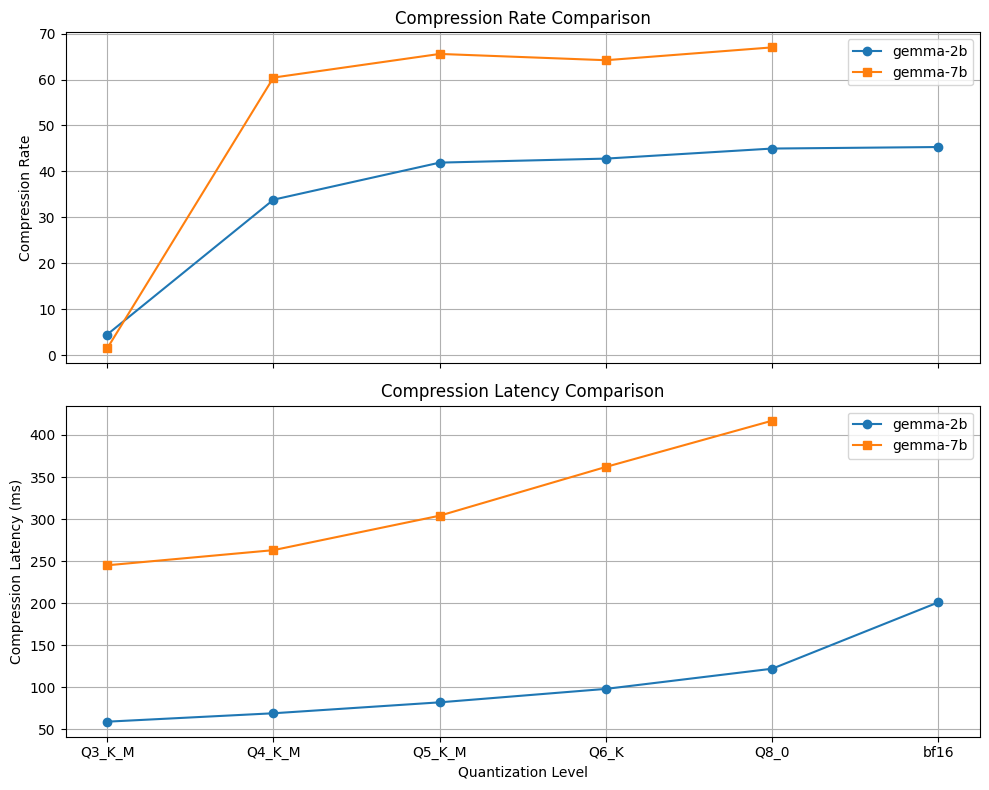

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Compression Rate Plot
axes[0].plot(df['model'], df['CR_2b'], marker='o', label='gemma-2b')
axes[0].plot(df['model'], df['CR_7b'], marker='s', label='gemma-7b')
axes[0].set_title("Compression Rate Comparison")
axes[0].set_ylabel("Compression Rate")
axes[0].legend()
axes[0].grid(True)

# Compression Latency Plot
axes[1].plot(df['model'], df['latency_2b'], marker='o', label='gemma-2b')
axes[1].plot(df['model'], df['latency_7b'], marker='s', label='gemma-7b')
axes[1].set_title("Compression Latency Comparison")
axes[1].set_xlabel("Quantization Level")
axes[1].set_ylabel("Compression Latency (ms)")
axes[1].legend()
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()
